## Notes about deep learning forecasting

If your data has multiple seasonal periods, the SARIMAX model cannot be used. In such a case, deep learning can be
used to leverage the information from both seasonal periods to make forecasts.

...simply because there is a nonlinear relationship between the features and the target. In those cases, deep learning models can be used to capture this
nonlinear relationship, and they have the added advantage of being very fast to train.

Types of models
Single step
Multi step
Multi output

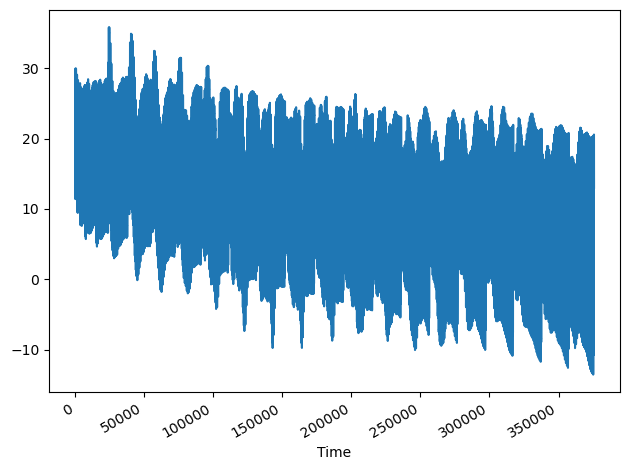

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from IPython.display import clear_output
import random
import math
import re
from sklearn.impute import SimpleImputer
import plotly.express as px

#importing dataset
train_df = pd.read_csv('/Users/hannahkim/Desktop/WiDS/data/train_data.csv')
train_df['startdate'] = pd.to_datetime(train_df['startdate'])
feature1 = 'nmme-tmp2m-56w__cfsv2'
feature2 = 'nmme-tmp2m-34w__gfdlflorb'
feature3 = 'contest-wind-h500-14d__wind-hgt-500'
feature4 = 'nmme-tmp2m-56w__gfdlflora'

target = 'contest-tmp2m-14d__tmp2m'

fig, ax = plt.subplots()
ax.plot(train_df[feature1])
ax.set_xlabel('Time')

fig.autofmt_xdate()
plt.tight_layout()

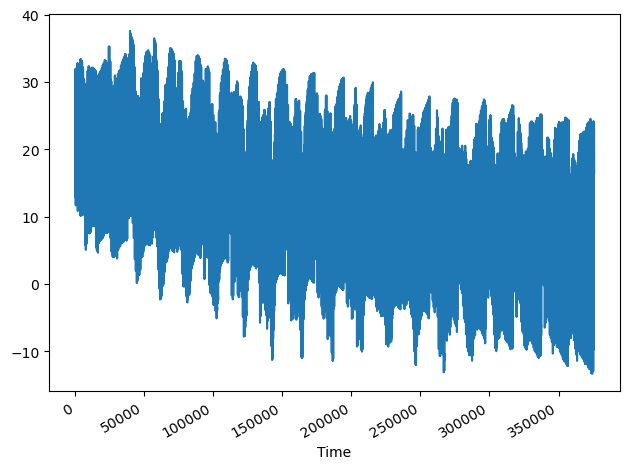

In [5]:
fig, ax = plt.subplots()
ax.plot(train_df[feature2])
ax.set_xlabel('Time')

fig.autofmt_xdate()
plt.tight_layout()

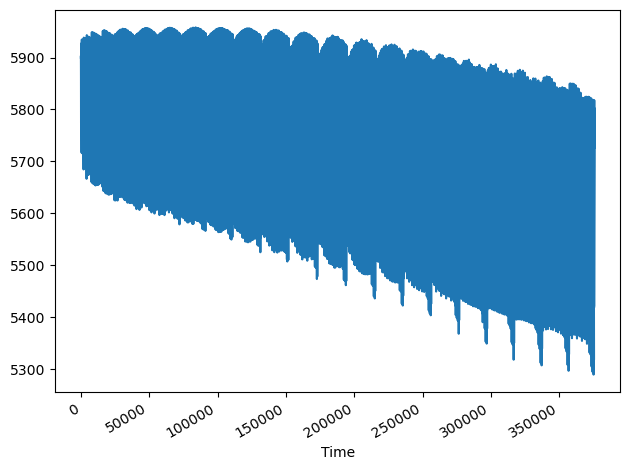

In [6]:
fig, ax = plt.subplots()
ax.plot(train_df[feature3])
ax.set_xlabel('Time')

fig.autofmt_xdate()
plt.tight_layout()

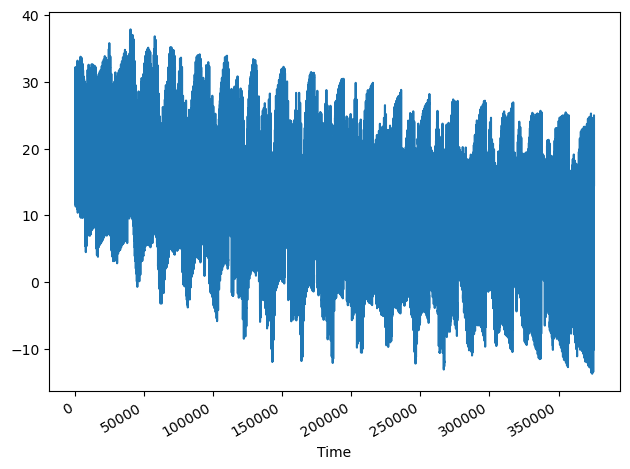

In [7]:
fig, ax = plt.subplots()
ax.plot(train_df[feature4])
ax.set_xlabel('Time')

fig.autofmt_xdate()
plt.tight_layout()

In [8]:
cols_to_keep = ['startdate']
train_df = train_df['startdate', ]

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,375729,1.0,0.866667,2016-08-27,312.05,23.13,27.20,20.25,24.43,18.35,...,-15.64,-75.68,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77
375730,375730,1.0,0.866667,2016-08-28,305.82,23.13,27.20,20.25,24.43,18.35,...,-7.59,-76.42,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10
375731,375731,1.0,0.866667,2016-08-29,311.62,23.13,27.20,20.25,24.43,18.35,...,-6.25,-70.65,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28
375732,375732,1.0,0.866667,2016-08-30,304.54,23.13,27.20,20.25,24.43,18.35,...,-7.16,-57.67,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22
